### Introduction to Regression with Neural Networks in Tensorflow

There are many definintions for a regression problem but in our case, we're going to simplify it: predicting a number based on some other combination of variables, even shorter... predicting a number

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.6.0


## Creating data to view and fit

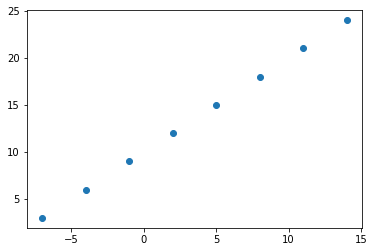

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels 
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create a demo tensor for out housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])


In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling in tensorflow

1. Creating a model - define input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X and y (features and labels)

In [ ]:
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)
])


# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3 Fit the model
model.fit(X, y, epochs=5)



Epoch 1/5
1/1 [==============================] - 0s 262ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

### Improve the model
We can improve the model by altering the steps we took to create a model.

1. We might add more layers, increase number of layers, change the activation function
2. We might change the optimization function or perhaps the learning rate
3. We might fit a model for more epochs or on more data

In [ ]:
model.evaluate(X, y)

1/1 [==============================] - 0s 123ms/step - loss: 10.8423 - mae: 10.8423


[10.842288970947266, 10.842288970947266]

In [ ]:
# Let's rebuild our model

# 1. create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 279ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 5m

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
# Let's try another model

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(1)
                             ])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

model.fit(X, y, epochs=500)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/500
1/1 [==============================] - 0s 407ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 11.5062 - mae: 11.5062
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 10.6739 - mae: 10.6739
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 9.8419 - mae: 9.8419
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 8.9962 - mae: 8.9962
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 8.1347 - mae: 8.1347
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 7.4053 - mae: 7.4053
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 6.6763 - mae: 6.6763
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 5.9141 - mae: 5.9141
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 5.1125 - mae: 5.1125
Epoch 11/500
1/1 [==============================] - 0s 7ms/step - loss:

In [ ]:
print(model.predict([45]))
print(X)
print(y)

[[56.889957]]
tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float64)
tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float64)


## Evaluating the model
In practice, a typical workflow you'll go through when building a neural network':

Build a model -> fit it -> evaluate it -> teak it -> evaluate it -> teak it -> fit it -> evauluate it etc....

In [ ]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

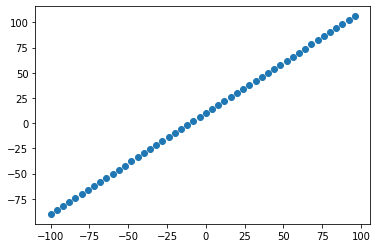

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets ...

* Training set
* Validation set
* Test set





In [ ]:
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the data
Now we've got our data in training and test sets, let's visualize it

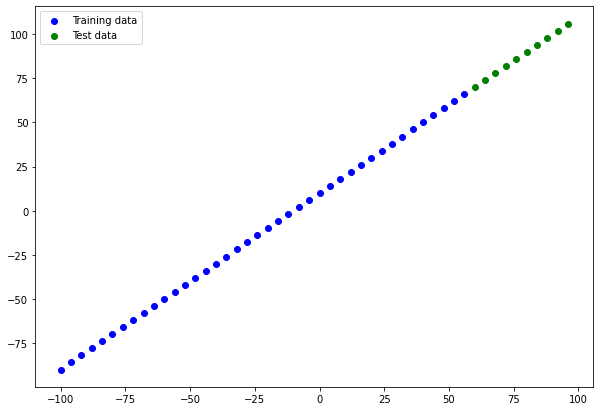

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Test data')
plt.legend();

In [ ]:
# Let's look at how to build a neural network

model = tf.keras.Sequential([tf.keras.layers.Dense(1)
                            ])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

#model.fit(X_train, y_train, epochs=100)


In [ ]:
# Let's create a model which builds automatically by specifying in the input shape in the layers
tf.random.set_seed(42)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation=tf.nn.relu, input_shape=[1], name='Input_layer'),
                             tf.keras.layers.Dense(1, name='Output_layer')
                            ])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Dense)          (None, 100)               200       
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=500, verbose=0)

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Dense)          (None, 100)               200       
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


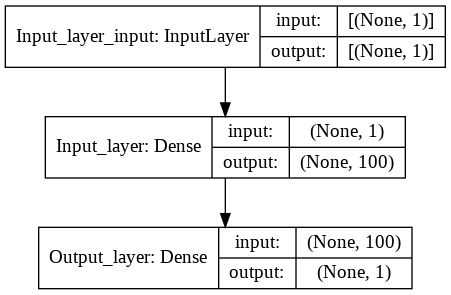

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[ 70.36167 ],
       [ 74.37558 ],
       [ 78.38949 ],
       [ 82.40339 ],
       [ 86.417305],
       [ 90.431206],
       [ 94.445114],
       [ 98.45903 ],
       [102.47294 ],
       [106.48685 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  "Plot training data, test data and compares predictions to ground truth"

  plt.figure(figsize=(10, 7))
  # Plot trianing data in blue
  plt.scatter(train_data, train_labels, c='b', label='Testing data')
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label='Testing data')
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c='r', label='Predictions')
  # Show the legend
  plt.legend();



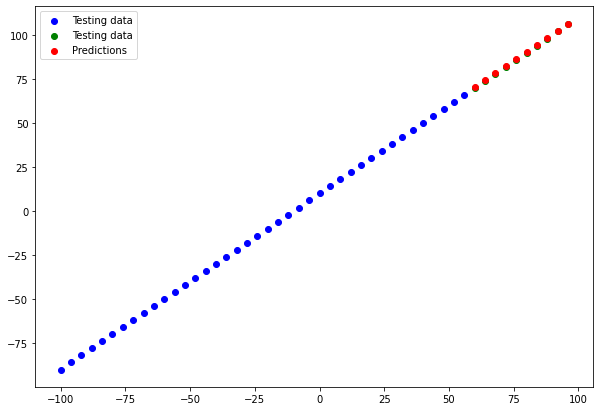

In [ ]:
plot_predictions()

###Evaluating our model's predictions with regression evaluation metrics

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 92ms/step - loss: 0.4243 - mae: 0.4243


[0.42425841093063354, 0.42425841093063354]

In [ ]:
# Calculate mean absolute error

loss = tf.keras.losses.mean_absolute_error(y_test, tf.constant(y_pred))
loss


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.710663 , 14.574652 , 12.2442045, 10.719322 , 10.       ,
       10.086241 , 10.978045 , 12.675418 , 15.17835  , 18.486847 ],
      dtype=float32)>

In [ ]:
# That didn't work, need to make both tensors and same shape.
#y_pred = tf.constant(y_pred)
#y_test = tf.reshape(y_test, shape=(10,)) # Can use tf.squeeze as well on y_pred

y_pred = tf.constant(y_pred)
y_pred = tf.squeeze(y_pred)

print(y_pred.shape, y_test.shape)

mae = tf.keras.losses.mean_absolute_error(y_true=y_test,
                                          y_pred=tf.squeeze(y_pred))
print(mae)  


(10,) (10,)
tf.Tensor(0.4242569, shape=(), dtype=float32)


In [ ]:
  print(f'this is y_test: {y_test.shape}\n and y_pred:\n {y_pred.shape}')
  

this is y_test: (10,)
 and y_pred:
 (10,)


In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred) 

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.36167 ,  74.37558 ,  78.38949 ,  82.40339 ,  86.417305,
        90.431206,  94.445114,  98.45903 , 102.47294 , 106.48685 ],
      dtype=float32)>

In [ ]:
mae2 = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae2

<tf.Tensor: shape=(), dtype=float32, numpy=0.4242569>

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse


<tf.Tensor: shape=(), dtype=float32, numpy=0.18158981>

In [ ]:
# Make MAE and MSE function
def mean_error(true, pred):
  mae = tf.metrics.mean_absolute_error(y_true=true,
                                       y_pred=tf.squeeze(pred))
  mse = tf.metrics.mean_squared_error(y_true=true,
                                      y_pred=tf.squeeze(pred))
  
  return mae, mse

### Running experiments to improve our model

'''
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it again -> fit it etc
'''
1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. 'Model_1' - same as the original model, 1l ayer trained for 100 epochs
2. 'Model_2' - 2 layers, trained for 100 epochs
3. 'Model_3' - 2 layers, trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

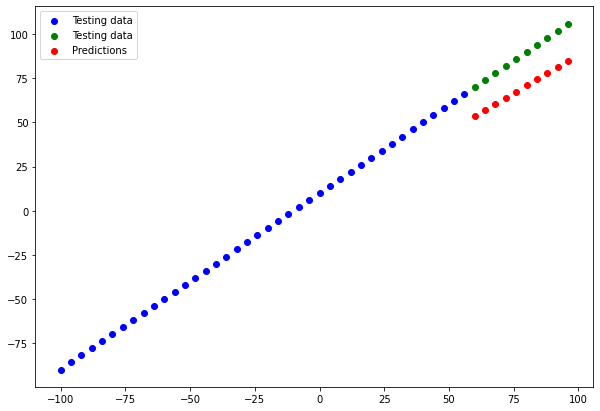

In [ ]:
# Make and plot the prediction of model 1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics

mae1, mse1 = mean_error(y_test, y_preds_1)
print(f'mae: {mae1}\nmse: {mse1}')

mae: 18.74532699584961
mse: 353.5733642578125


In [ ]:
# Create model 2
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(100, activation='relu'))
model_2.add(tf.keras.layers.Dense(1))

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 45.1062 - mse: 2830.4868
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 18.3419 - mse: 468.4395
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 20.8695 - mse: 681.0693
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1107 - mse: 161.1085
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 9.6247 - mse: 131.6571
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 10.3983 - mse: 157.2162
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 10.5621 - mse: 199.7152
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 13.1510 - mse: 279.2294
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 22.8907 - mse: 906.0086
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 10.8871 - mse: 172.6375
Epoch 11/100
2/2 [==============================

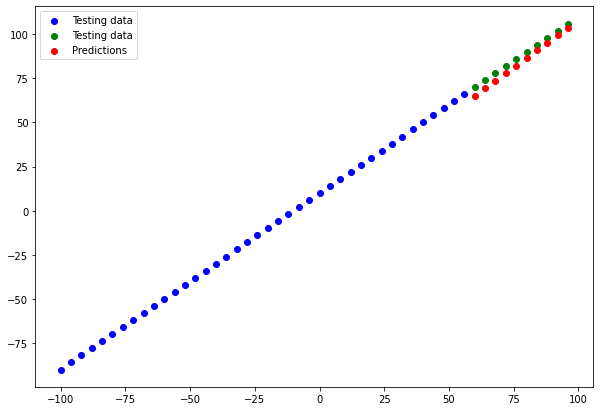

In [ ]:
# Make a plot of the predictions of model 2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate the error metrics:
mae2, mse2 = mean_error(y_test, y_preds_2)

print(f'mae: {mae2}\nmse: {mse2}')

mae: 3.647570848464966
mse: 13.998846054077148


In [ ]:
# OK now for model 3:
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10, activation='relu'),
                               #tf.keras.layers.Dense(2, activation='relu'),
                               tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
model_3.fit(X_train, y_train, epochs=1000, callbacks=[callback])

Epoch 1/1000
2/2 [==============================] - 0s 5ms/step - loss: 30.1367 - mae: 30.1367
Epoch 2/1000
2/2 [==============================] - 0s 3ms/step - loss: 9.6745 - mae: 9.6745
Epoch 3/1000
2/2 [==============================] - 0s 9ms/step - loss: 19.2564 - mae: 19.2564
Epoch 4/1000
2/2 [==============================] - 0s 8ms/step - loss: 4.8674 - mae: 4.8674
Epoch 5/1000
2/2 [==============================] - 0s 7ms/step - loss: 7.4681 - mae: 7.4681
Epoch 6/1000
2/2 [==============================] - 0s 3ms/step - loss: 15.1391 - mae: 15.1391
Epoch 7/1000
2/2 [==============================] - 0s 7ms/step - loss: 14.6511 - mae: 14.6511
Epoch 8/1000
2/2 [==============================] - 0s 2ms/step - loss: 12.0498 - mae: 12.0498
Epoch 9/1000
2/2 [==============================] - 0s 6ms/step - loss: 16.4309 - mae: 16.4309
Epoch 10/1000
2/2 [==============================] - 0s 7ms/step - loss: 5.3197 - mae: 5.3197
Epoch 11/1000
2/2 [==============================] - 0s 7

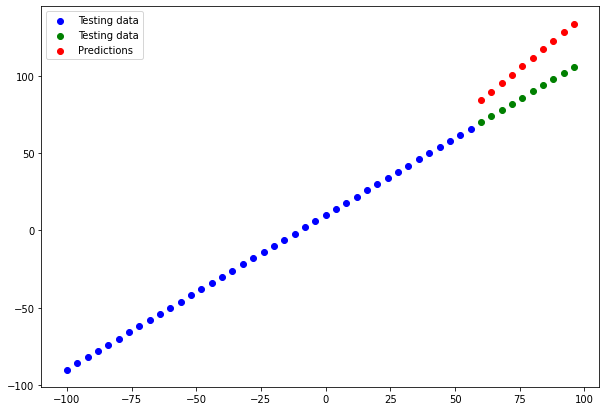

In [ ]:
# Plot for shizzle
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Measurment metrics:

mae3, mse3 = mean_error(y_test, y_preds_3)
print(f'mae: {mae3}\nmse: {mse3}')

# Little note is that for these problems it seems that having a bunch of neurons is not a good idea.

mae: 21.124980926513672
mse: 465.3534240722656


## Comparing the results of our experiments 
We've run a lot of experiments. Lets compare them

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [['model_1', mae1.numpy(), mse1.numpy()],
                 ['model_2', mae2.numpy(), mse2.numpy()],
                 ['model_3', mae3.numpy(), mse3.numpy()]]
              
all_results = pd.DataFrame(model_results, columns=['models', 'mae', 'mse'])
all_results

,models,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.647571,13.998846
2,model_3,21.124981,465.353424


## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments. 

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

Resources: 

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights and biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)

## Saving our models

Saving our models allows us to use them outside of google colab

In [ ]:
# Save model using savemodel
model_3.save('test_model_3')
        

## NOTE ## TFLOW på zerotohero sine sider for å få 15% av


INFO:tensorflow:Assets written to: test_model_3/assets


In [ ]:
model_3.save('test_model_3.h5')

In [ ]:
# Load in the savemodel format
loaded_save_model = tf.keras.models.load_model('test_model_3')

loaded_save_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loaded_ht5_model = tf.keras.models.load_model('test_model_3.h5')

loaded_ht5_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Downlaod a model (or any other file) from google colab

If you want to download your files from google colab:

1. You can go to the files tab and right click on the file you're after and click download.
2. Use code (see below)

In [ ]:
from google.colab import files
files.download('/content/test_model_3.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from google colab to google drive

!cp /content/test_model_3.h5 /content/drive/MyDrive/TensforFlow_course

In [ ]:
!ls /content/drive/MyDrive/TensforFlow_course


test_model_3.h5


## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import OneHotEncoder




In [ ]:
# Read in the incurance dataset

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

print(insurance['region'].unique())

['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
insurance_features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
y = insurance.charges

X = insurance[insurance_features]
X_copy = X.copy()


In [ ]:
# Encode the categorical labels
smoke_encoder = LabelEncoder()
smoke_encoder.fit(X.loc[:, 'smoker'])
smoke_values = smoke_encoder.transform(X.loc[:, 'smoker'])


sex_encoder = LabelEncoder()
sex_encoder.fit(X['sex'])
sex_values = sex_encoder.transform(X['sex'])


In [ ]:
# One hot encoding

region_encoder = OneHotEncoder()


In [ ]:
# One hot encoding with myself
regions = X_copy.loc[:, 'region']

region_numbers = dict([(y, x+1) for x, y in enumerate(sorted(set(regions)))])

region_values = [region_numbers[x] for x in regions]


  

In [ ]:
X_copy.loc[:, 'smoker'] = smoke_values
X_copy.loc[:, 'sex'] = sex_values
X_copy.loc[:, 'region'] = region_values

#print(X_copy.head())

#X_copy.loc[:, insurance_features] = X_copy.loc[:, insurance_features].astype(dtype=np.float32)

X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.2)

#X_train.loc[:, ('sex', 'smoker')] = tf.constant(X_train.loc[:, ('sex', 'smoker')], dtype=tf.float32)
#X_train.loc[0, 'age'].dtype

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10000, activation='tanh'),
    #tf.keras.layers.Dense(100, activation='relu'),
    #tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

sgd = tf.keras.optimizers.SGD()
adam = tf.keras.optimizers.Adam()

model.compile(loss=tf.keras.losses.mae,
              optimizer=adam,
              metrics=['mae'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)



model.fit(X_train, y_train, epochs=1000, callbacks=[callback, CustomCallback()])

NameError: ignored

In [ ]:
y_pred = model.predict(X_test)




In [ ]:
def plot_predictions2(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions):
  "Plot training data, test data and compares predictions to ground truth"

  plt.figure(figsize=(10, 7))
  # Plot trianing data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label='Testing data')
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c='r', label='Predictions')
  # Show the legend
  plt.legend();

train_len = np.arange(len(y_train))
test_len = np.arange(len(train_len), (len(train_len) + len(y_test)))



plot_predictions2(train_len, y_train, test_len, y_test, y_pred)



In [ ]:
# Below is what he does in the video
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import OneHotEncoder

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
feature_list = [x for x in insurance_one_hot.columns if x != 'charges']

X2 = insurance_one_hot[feature_list]
y2 = insurance_one_hot['charges']

#X2_copy = X2.copy()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('loss') <=1000):
      print(f'\n\n\nReached 1000 loss value so cancelling training!\n\n\n')
      self.model.stop_training = True

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

In [ ]:
tf.random.set_seed(42)
model2 = tf.keras.Sequential([
                              tf.keras.layers.Dense(100),
                              tf.keras.layers.Dense(10),
                              tf.keras.layers.Dense(1)
])

adam = tf.keras.optimizers.Adam()
sgd = tf.keras.optimizers.SGD()

model2.compile(loss=tf.keras.losses.mae,
               optimizer=adam,
               metrics=['mae'])



history = model2.fit(X_train, y_train, epochs=200, callbacks=[callback, CustomCallback()], verbose=2)


In [ ]:
y2_pred = model2.predict(X_test)

In [ ]:
# Evaluate our model:
model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3494.5291 - mae: 3494.5291


[3494.529052734375, 3494.529052734375]

Text(0.5, 0, 'epochs')

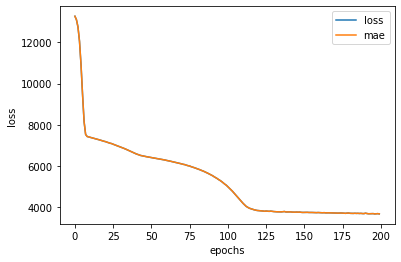

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

How long you should be training for depends on the problem you're working on. Early stopping callback. I have already done so.

## Preprocessing data (normalization and standardization)


In [ ]:
X_normalize = tf.keras.utils.normalize(X2)


X_train, X_test, y_train, y_test = train_test_split(X_normalize, y2, test_size=0.2, random_state=42)


In [ ]:
normalized_model = tf.keras.Sequential([
                                              tf.keras.layers.Dense(100),
                                              tf.keras.layers.Dense(10),
                                              tf.keras.layers.Dense(1)
])


adam = tf.keras.optimizers.Adam()
sgd = tf.keras.optimizers.SGD()

normalized_model.compile(loss=tf.keras.losses.mae,
                         optimizer=adam,
                         metrics=['mae'])

history = normalized_model.fit(X_train, y_train, epochs=200, callbacks=[callback, CustomCallback()], verbose=0)

Text(0.5, 0, 'epochs')

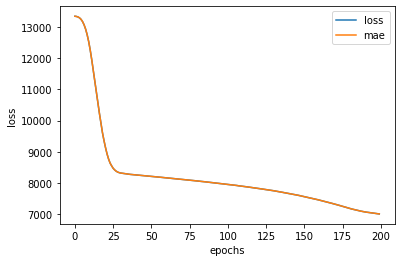

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

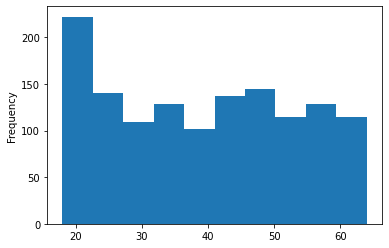

In [ ]:
X2['age'].plot(kind='hist')

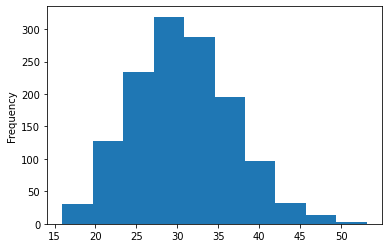

In [ ]:
X2['bmi'].plot(kind='hist')

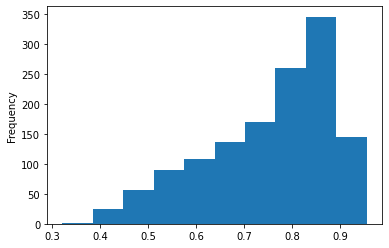

In [ ]:
X_normalize['age'].plot(kind='hist')

## This is what he does in the video

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# To prepare our data, we can borrow a few classes from Scikit-Learn

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a columntransformer

ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), #Turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X and y values

X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Tranform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [ ]:
# Build a neural network model to fit our nomralized data
tf.random.set_seed(42)
normalized_insurance_model = tf.keras.Sequential([
                                                  tf.keras.layers.Dense(100),
                                                  tf.keras.layers.Dense(10),
                                                  tf.keras.layers.Dense(1)
])

adam = tf.keras.optimizers.Adam()

normalized_insurance_model.compile(loss=tf.keras.losses.mae,
                         optimizer=adam,
                         metrics=['mae'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)

history = normalized_insurance_model.fit(X_train_normal, y_train, epochs=1000, verbose=2, callbacks=[callback])


Epoch 1/1000
34/34 - 0s - loss: 13341.5391 - mae: 13341.5391
Epoch 2/1000
34/34 - 0s - loss: 13321.8984 - mae: 13321.8984
Epoch 3/1000
34/34 - 0s - loss: 13277.1846 - mae: 13277.1846
Epoch 4/1000
34/34 - 0s - loss: 13201.2471 - mae: 13201.2471
Epoch 5/1000
34/34 - 0s - loss: 13092.6562 - mae: 13092.6562
Epoch 6/1000
34/34 - 0s - loss: 12951.2773 - mae: 12951.2773
Epoch 7/1000
34/34 - 0s - loss: 12777.6377 - mae: 12777.6377
Epoch 8/1000
34/34 - 0s - loss: 12572.0049 - mae: 12572.0049
Epoch 9/1000
34/34 - 0s - loss: 12334.5479 - mae: 12334.5479
Epoch 10/1000
34/34 - 0s - loss: 12067.0342 - mae: 12067.0342
Epoch 11/1000
34/34 - 0s - loss: 11776.1240 - mae: 11776.1240
Epoch 12/1000
34/34 - 0s - loss: 11464.8945 - mae: 11464.8945
Epoch 13/1000
34/34 - 0s - loss: 11154.1631 - mae: 11154.1631
Epoch 14/1000
34/34 - 0s - loss: 10851.0068 - mae: 10851.0068
Epoch 15/1000
34/34 - 0s - loss: 10562.4170 - mae: 10562.4170
Epoch 16/1000
34/34 - 0s - loss: 10272.9180 - mae: 10272.9180
Epoch 17/1000
34/

In [ ]:
# Evaluate the model on normalized data
normalized_insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3161.0132 - mae: 3161.0132


[3161.01318359375, 3161.01318359375]

Text(0.5, 0, 'epochs')

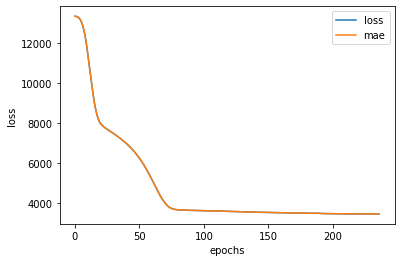

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

So basically what you want to do is to take the data you are working on and normalize it and encode it before you go on and build the model. And in some other cases you want to reshape it maybe, flatten it or transform it in any other way that suits the task you have at hand.